In [2]:
# import dependancies
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter


In [3]:
# import csv files
bleaching_keywords_df = pd.read_csv('C:/Users/OI/Desktop/bleaching_keywords.csv')
# bleaching_keywords_df.head()
bleaching_keywords_gbr_df = pd.read_csv('C:/Users/OI/Desktop/bleaching_keywords_gbr.csv')
# bleaching_keywords_gbr_df.head()
broad_damage_keywords_df = pd.read_csv('C:/Users/OI/Desktop/broad_damage_keywords.csv')
# broad_damage_keywords_df.head()
damage_keywords_df = pd.read_csv('C:/Users/OI/Desktop/damage_keywords.csv')
# damage_keywords_df.head()
damage_keywords_gbr_df = pd.read_csv('C:/Users/OI/Desktop/damage_keywords_gbr.csv')
# damage_keywords_gbr_df.head()
general_interest_keywords_df = pd.read_csv('C:/Users/OI/Desktop/general_interest_keywords.csv')
# general_interest_keywords_df.head()
general_interest_keywords_gbr_df = pd.read_csv('C:/Users/OI/Desktop/general_interest_keywords_gbr.csv')
# general_interest_keywords_gbr_df.head()


reef_articles_df = pd.read_csv('C:/Users/OI/Desktop/reef_articles_by_month2014_2017.csv')
# reef_articles_df.head()

In [4]:
##### probably won't use this, but it's in here just in case
# general_interest_keywords_flk_df = pd.read_csv('C:/Users/OI/Desktop/general_interest_keywords_flk.csv')
# general_interest_keywords_flk_df.head()

In [5]:
#create overall dataframe through sucessive merges
complete_google_trend_df = pd.merge(bleaching_keywords_df, bleaching_keywords_gbr_df, on='Month')
complete_google_trend_df = pd.merge(complete_google_trend_df, broad_damage_keywords_df, on='Month')
complete_google_trend_df = pd.merge(complete_google_trend_df, damage_keywords_df, on='Month')
complete_google_trend_df = pd.merge(complete_google_trend_df, damage_keywords_gbr_df, on='Month')
complete_google_trend_df = pd.merge(complete_google_trend_df, general_interest_keywords_df, on='Month')
complete_google_trend_df = pd.merge(complete_google_trend_df, general_interest_keywords_gbr_df, on='Month')

#set index to 'month'

# complete_google_trend_df = complete_google_trend_df.set_index("Month")

#create column with average of all rows

complete_google_trend_df["average"] = complete_google_trend_df.mean(axis=1)

#test
complete_google_trend_df.head(1)

,Month,bleached coral: (Worldwide),bleached reef: (Worldwide),reef bleaching: (Worldwide),coral reef bleaching: (Worldwide),coral bleaching: (Worldwide),bleached coral reefs: (Worldwide),coral reef bleached: (Worldwide),what is coral bleaching: (Worldwide),what causes coral bleaching: (Worldwide),...,where are coral reefs found: (Worldwide),coral reef ecosystem: (Worldwide),what is a coral reef ecosystem: (Worldwide),great barrier reef scuba: (Worldwide),scuba diving in the great barrier reef: (Worldwide),great barrier reef: (Worldwide),great barrier reef diving: (Worldwide),great barrier reef facts: (Worldwide),what is the great barrier reef: (Worldwide),average
0,2004-01,21,0,30,36,51,0,0,0,0,...,40,54,0,81,0,46,89,36,37,23.879121


In [6]:
#create complete bleaching-damage dataframe through merges

complete_damage_df = pd.merge(bleaching_keywords_df, bleaching_keywords_gbr_df, on='Month')
complete_damage_df = pd.merge(complete_damage_df, broad_damage_keywords_df, on='Month')
complete_damage_df = pd.merge(complete_damage_df, damage_keywords_df, on='Month')
complete_damage_df = pd.merge(complete_damage_df, damage_keywords_gbr_df, on='Month')

complete_damage_df["average"] = complete_damage_df.mean(axis=1)

complete_damage_df.head(1)

,Month,bleached coral: (Worldwide),bleached reef: (Worldwide),reef bleaching: (Worldwide),coral reef bleaching: (Worldwide),coral bleaching: (Worldwide),bleached coral reefs: (Worldwide),coral reef bleached: (Worldwide),what is coral bleaching: (Worldwide),what causes coral bleaching: (Worldwide),...,why is the great barrier reef dying: (Worldwide),the great barrier reef is dying: (Worldwide),is great barrier reef dying: (Worldwide),great barrier reef ocean acidification: (Worldwide),great barrier reef global warming: (Worldwide),death of the great barrier reef: (Worldwide),great coral reef dead: (Worldwide),the great coral reef dead: (Worldwide),great barrier reef dead coral: (Worldwide),average
0,2004-01,21,0,30,36,51,0,0,0,0,...,0,0,0,0,0,0,0,0,0,14.058824


In [7]:
#create complete general interest dataframe through merges
complete_general_df = pd.merge(general_interest_keywords_df, general_interest_keywords_gbr_df, on='Month')

complete_general_df["average"] = complete_general_df.mean(axis=1)

complete_general_df.head(1)

,Month,coral: (Worldwide),reef: (Worldwide),coral reef: (Worldwide),reef diving: (Worldwide),reef scuba: (Worldwide),why are coral reefs important: (Worldwide),coral reef fish: (Worldwide),coral reef habitat: (Worldwide),coral reef animals: (Worldwide),...,where are coral reefs found: (Worldwide),coral reef ecosystem: (Worldwide),what is a coral reef ecosystem: (Worldwide),great barrier reef scuba: (Worldwide),scuba diving in the great barrier reef: (Worldwide),great barrier reef: (Worldwide),great barrier reef diving: (Worldwide),great barrier reef facts: (Worldwide),what is the great barrier reef: (Worldwide),average
0,2004-01,91,84,82,100,96,0,68,100,83,...,40,54,0,81,0,46,89,36,37,52.913043


In [8]:
#create complete great barrier reef keyword dataframe through merges
complete_gbr_df = pd.merge(bleaching_keywords_gbr_df, general_interest_keywords_gbr_df, on='Month')
complete_gbr_df = pd.merge(complete_gbr_df, damage_keywords_gbr_df, on='Month')

complete_gbr_df["average"] = complete_gbr_df.mean(axis=1)

complete_gbr_df.head(1)

,Month,coral bleaching great barrier reef: (Worldwide),coral bleaching on the great barrier reef: (Worldwide),coral bleaching in the great barrier reef: (Worldwide),bleaching great barrier reef: (Worldwide),what is coral bleaching great barrier reef: (Worldwide),bleaching of the great barrier reef: (Worldwide),bleached great barrier reef: (Worldwide),great barrier reef bleaching: (Worldwide),great barrier reef coral bleaching: (Worldwide),...,why is the great barrier reef dying: (Worldwide),the great barrier reef is dying: (Worldwide),is great barrier reef dying: (Worldwide),great barrier reef ocean acidification: (Worldwide),great barrier reef global warming: (Worldwide),death of the great barrier reef: (Worldwide),great coral reef dead: (Worldwide),the great coral reef dead: (Worldwide),great barrier reef dead coral: (Worldwide),average
0,2004-01,0,0,61,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,12.833333


In [9]:
# get dataframe with just the average and month from the complete keyword dataframe
complete_gt_month_avg_df = complete_google_trend_df[["Month","average"]]
complete_gt_month_avg_df.head(1)
# complete_gt_month_avg_df.dtypes


,Month,average
0,2004-01,23.879121


In [10]:
# get dataframe with just the average and month from the complete damage df
complete_dam_month_avg_df = complete_damage_df[["Month", "average"]]
complete_dam_month_avg_df.head(1)
# complete_dam_month_avg_df.dtypes



,Month,average
0,2004-01,14.058824


In [11]:
# get dataframe with just the average and month from the complete general df
complete_gen_month_avg_df = complete_general_df[["Month", "average"]]
complete_gen_month_avg_df.head(1)
# complete_dam_month_avg_df.dtypes

,Month,average
0,2004-01,52.913043


In [12]:
# get dataframe with just the average and month from the complete gbr dataframe
complete_gbr_month_avg_df = complete_gbr_df[["Month","average"]]
complete_gbr_month_avg_df.head(1)
# complete_gt_month_avg_df.dtypes

,Month,average
0,2004-01,12.833333


In [13]:
# x = "2010-01"

# x.split("-")

# years,month = complete_gbr_month_avg_df["Month"].split("-")

# complete_gbr_month_avg_df["Month"].str.split("-").str[0]



In [14]:
# plt.xticks(complete_gt_month_avg_df['average'], complete_gt_month_avg_df.index.values)
# plt.plot( complete_gt_month_avg_df['average'])
# plt.show()

In [15]:
# average = complete_google_trend_df.mean()

# years = average.keys()

# lables = complete_google_trend_df.index.values

# plt.plot(years, average, color="blue", label="World Average")

# plt.xticks(years, lables, rotation='vertical')

# plt.figure(figsize=(80,5))


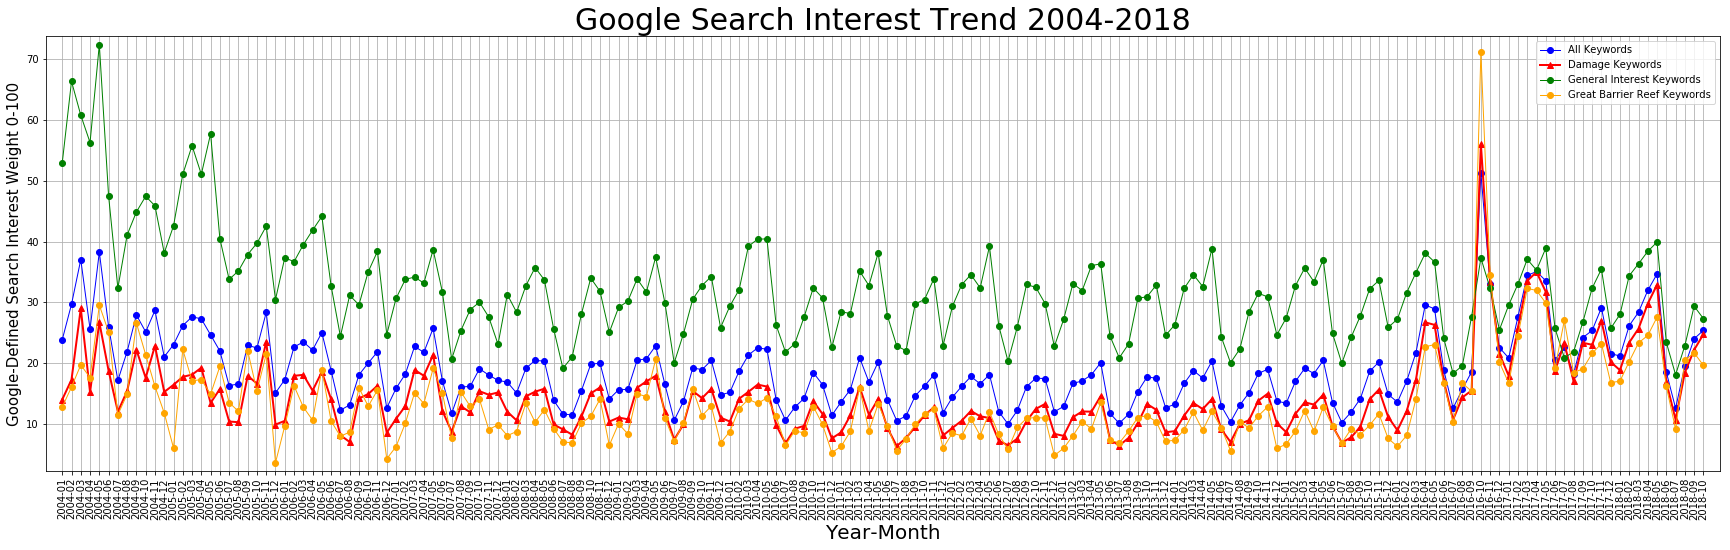

In [27]:
# plt.plot(complete_gt_month_avg_df['average'])
# plt.xticks(range(len(complete_gt_month_avg_df['Month'])), complete_gt_month_avg_df['Month'])
# # plt.figure(figsize=(80,10))


fig = plt.figure()
fig.set_figheight(8)
fig.set_figwidth(30)
plt.grid()
plt.margins(0.01, 0.02)
plt.plot(complete_gt_month_avg_df['average'], linewidth=1, marker="o", color="blue", label="All Keywords")
plt.plot(complete_dam_month_avg_df['average'], linewidth=2, marker="^", color="red", label="Damage Keywords")
plt.plot(complete_gen_month_avg_df['average'], linewidth=1, marker="o", color="green", label="General Interest Keywords")
plt.plot(complete_gbr_month_avg_df['average'], linewidth=1, marker="o", color="orange", label="Great Barrier Reef Keywords")
plt.xticks(range(len(complete_gt_month_avg_df['Month'])), complete_gt_month_avg_df['Month'], rotation='vertical')

plt.title("Google Search Interest Trend 2004-2018", fontsize=30)
plt.xlabel("Year-Month", fontsize=20)
plt.ylabel("Google-Defined Search Interest Weight 0-100", fontsize=15)
plt.legend(loc="best")
fig.savefig("C:/Users/OI/Desktop/myfig.png", dpi=600)

# plt.show()

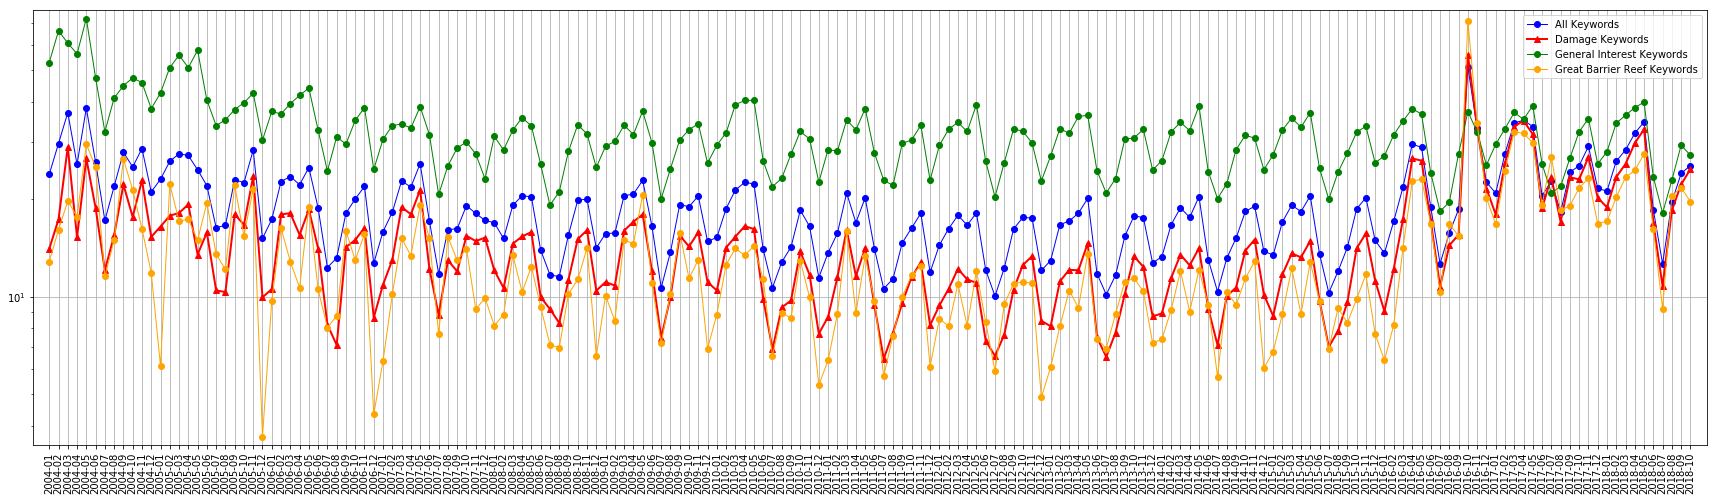

In [21]:
# better resloution with a log scale?

fig = plt.figure()
fig.set_figheight(8)
fig.set_figwidth(30)
plt.grid()
plt.margins(0.01, 0.02)
plt.semilogy(complete_gt_month_avg_df['average'], linewidth=1, marker="o", color="blue", label="All Keywords")
plt.semilogy(complete_dam_month_avg_df['average'], linewidth=2, marker="^", color="red", label="Damage Keywords")
plt.semilogy(complete_gen_month_avg_df['average'], linewidth=1, marker="o", color="green", label="General Interest Keywords")
plt.semilogy(complete_gbr_month_avg_df['average'], linewidth=1, marker="o", color="orange", label="Great Barrier Reef Keywords")
plt.xticks(range(len(complete_gt_month_avg_df['Month'])), complete_gt_month_avg_df['Month'], rotation='vertical')
plt.legend(loc="best")
# fig.savefig("C:/Users/OI/Desktop/myfig.png", dpi=600)

# plt.show()

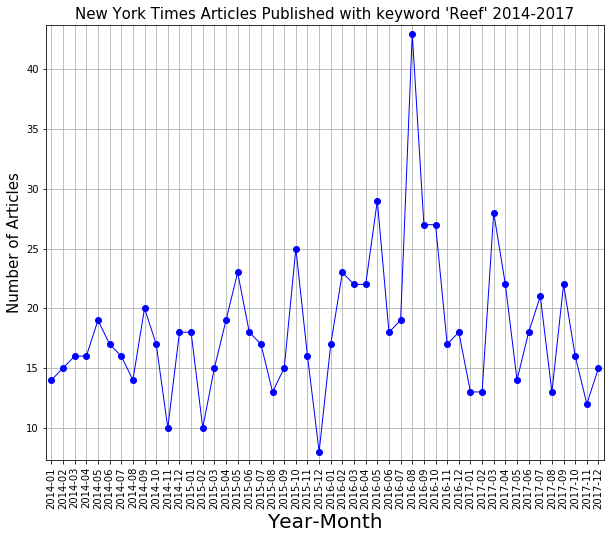

In [32]:
fig = plt.figure()
fig.set_figheight(8)
fig.set_figwidth(10)
plt.grid()
plt.margins(0.01, 0.02)
plt.plot(reef_articles_df['articles'], linewidth=1, marker="o", color="blue")
plt.xticks(range(len(reef_articles_df['Month'])), reef_articles_df['Month'], rotation='vertical')

plt.title("New York Times Articles Published with keyword 'Reef' 2014-2017", fontsize=15)
plt.xlabel("Year-Month", fontsize=20)
plt.ylabel("Number of Articles", fontsize=15)
# plt.legend(loc="best")
fig.savefig("C:/Users/OI/Desktop/myfig.png", dpi=600)